In [22]:
# Data Analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, train_test_split

# **4. 데이터 전처리**

In [23]:
# Load Data
data = pd.read_csv("master.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


### **4-a. Data Restructuring (데이터 재구조화)**

#### **Table Decomposition**

In [24]:
# Delete duplicate attribute: "suicides_no", "population"
# "suicides/100k pop" * 10^5 = "suicides_no" / "population" 
data.drop("suicides_no", axis = 1, inplace = True)
data.drop("population", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   country-year        27820 non-null  object 
 6   HDI for year        8364 non-null   float64
 7   gdp_for_year ($)    27820 non-null  object 
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 2.1+ MB
None


In [25]:
# Delete duplicate attribute: "country-year"
# "country" and "year" attributes also exist separately
data.drop("country-year", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   HDI for year        8364 non-null   float64
 6   gdp_for_year ($)    27820 non-null  object 
 7   gdp_per_capita ($)  27820 non-null  int64  
 8   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB
None


In [26]:
# Delete duplicate attribute: "gdp_for_year ($)"
# "gdp_for_year ($)" is proportional to "gdp_per_capita ($)"
data.drop("gdp_for_year ($)", axis = 1, inplace = True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   HDI for year        8364 non-null   float64
 6   gdp_per_capita ($)  27820 non-null  int64  
 7   generation          27820 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB
None


### **관련 설명**
#### **"suicides_no", "population" 제거**
`suicides/100k pop` 컬럼은 `suicides_no`를 *population*으로 나눈 후에 *100,000*을 곱한 값이다. 따라서 `suicides_no`와 *population*은 `suicides/100k pop`를 통해 이미 표현되고 있어서, 이 두 컬럼은 중복 정보를 제공하며, 데이터셋의 차원을 줄이기 위해 제거한다.
<br>

#### **"country-year" 제거**
`country-year`는 **country**와 **year**의 결합된 정보를 제공하는 컬럼이다. 개별 컬럼을 사용하는 것이 데이터 처리에 더 유연하며, 필요한 경우 언제든지 이 두 속성을 결합하여 동일한 정보를 재생성할 수 있다.
<br>

#### **"gdp_for_year ($)" 제거**
`gdp_for_year ($)`는 **국가의 연간 총 GDP**를 나타내고, `gdp_per_capita ($)`는 **인구 대비 GDP**를 나타낸다. 이 두 값은 서로 비례 관계에 있으므로 **국가의 총 GDP**는 *인구 수*와 *1인당 GDP*의 곱으로 계산될 수 있다. 이런 경우 `gdp_for_year ($)`는 `gdp_per_capita ($)`와 인구 데이터를 통해 추론할 수 있으므로, 중복되는 정보를 제공하고 데이터셋의 복잡성을 불필요하게 증가시킬 수 있어 제거한다.

### **4-b. Data Value Changes(데이터 값 변환)**

#### **Cleaning dirty data**

In [27]:
# Check missing values in original dataset
print("Original Dataset:")
print(data.isnull().sum())

Original Dataset:
country                   0
year                      0
sex                       0
age                       0
suicides/100k pop         0
HDI for year          19456
gdp_per_capita ($)        0
generation                0
dtype: int64


In [28]:
# Determine what percentage is missing : 69.94%
missing_value = sum(pd.isnull(data["HDI for year"]))/len(data["HDI for year"])
print(f"Percentage of missing value of \"HDI for year\": {missing_value * 100:.2f}%\n")

# Delete missing attribute: "HDI for year"
data.drop("HDI for year", axis = 1, inplace = True)

print(data.info())

Percentage of missing value of "HDI for year": 69.94%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides/100k pop   27820 non-null  float64
 5   gdp_per_capita ($)  27820 non-null  int64  
 6   generation          27820 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB
None


### **관련 설명**
데이터셋에서 각 컬럼별로 누락된 값의 수를 계산하여, `HDI for year`컬럼의 누락된 값의 수가 같은 컬럼 내의 전체 데이터의 70%에 달하는 걸 도출했다. -> `HDI for year` 컬럼 삭제


#### **Text preprocessing**

In [29]:
# Remove 'years' text
data["age"] = data["age"].str.strip(" years")

print(data['age'])

0        15-24
1        35-54
2        15-24
3          75+
4        25-34
         ...  
27815    35-54
27816      75+
27817     5-14
27818     5-14
27819    55-74
Name: age, Length: 27820, dtype: object


### **관련 설명**
`age` 컬럼에 **years** 텍스트를 제거한다

#### **Data discretization**

In [30]:
# Change the string of the age to an integer

# Define the function to convert age strings to integers
def convert_age(age):
    if '75+' in age:
        return 80
    elif '55-74' in age:
        return 65
    elif '35-54' in age:
        return 45
    elif '25-34' in age:
        return 30
    elif '15-24' in age:
        return 20
    elif '5-14' in age:
        return 10
    else:
        return None

# Apply the function to the 'age' column in both train and test datasets
data['age'] = data['age'].apply(convert_age)

# Verify the changes by grouping by age and calculating the mean suicide rate
age_grouped = data[['age', 'suicides/100k pop']].groupby('age', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Display the results
print(data['age'])

0        20
1        45
2        20
3        80
4        30
         ..
27815    45
27816    80
27817    10
27818    10
27819    65
Name: age, Length: 27820, dtype: int64


### **관련 설명**
데이터 타입을 **object타입**에서 **int타입**으로 바꾸고, 각 연령대의 *중간값*으로 인코딩했다. 

#### **Encoding for data mining algorighoms**

In [31]:
# Pre-processing sex property using label encoding

# Define the mapping function using map
sex_mapping = {'female': 0, 'male': 1}

data['sex'] = data['sex'].map(sex_mapping)

# Verify the changes by grouping by sex and calculating the mean suicide rate
sex_grouped = data[['sex', 'suicides/100k pop']].groupby('sex', as_index=False).mean().sort_values(by='suicides/100k pop', ascending=False)

# Display the results
print(data['sex'])

0        1
1        1
2        0
3        1
4        1
        ..
27815    0
27816    0
27817    1
27818    0
27819    0
Name: sex, Length: 27820, dtype: int64


### **관련 설명**
**라벨 인코딩**을 사용하여 **남자**는 **1**, **여자**는 **0**으로 변환하였다

In [32]:
# Pre-processing generation property using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['generation'])

# Extract the column names generated by one-hot encoding
one_hot_columns = [col for col in data_encoded.columns if 'generation_' in col]

# Add one-hot encoded columns to the original data frame
data = data.join(data_encoded[one_hot_columns])

# Drop the original 'generation' column
data.drop(columns=['generation'], inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     27820 non-null  object 
 1   year                        27820 non-null  int64  
 2   sex                         27820 non-null  int64  
 3   age                         27820 non-null  int64  
 4   suicides/100k pop           27820 non-null  float64
 5   gdp_per_capita ($)          27820 non-null  int64  
 6   generation_Boomers          27820 non-null  bool   
 7   generation_G.I. Generation  27820 non-null  bool   
 8   generation_Generation X     27820 non-null  bool   
 9   generation_Generation Z     27820 non-null  bool   
 10  generation_Millenials       27820 non-null  bool   
 11  generation_Silent           27820 non-null  bool   
dtypes: bool(6), float64(1), int64(4), object(1)
memory usage: 1.4+ MB
None


### **4-c. Feature Engineering(특성 엔지니어링)**

#### **Feature Creation**

In [33]:
# 전처리 4-c 부분 (Feature Engineering) 이 코드로 수정됨
# Calculate the 70% of the mean suicide rate
mean_suicide_rate = data["suicides/100k pop"].mean()
threshold = mean_suicide_rate * 0.7  ## 수정사항 =============> threshold = mean * 0.7

# Create a new attribute, Over_mean_suicides
# 1 if the suicide rate is higher than 70% of the mean suicide rate, 0 otherwise
data["Over_threshold_suicides"] = np.where(data["suicides/100k pop"] > threshold, 1, 0)

# Print the updated DataFrame information to see the new attribute and changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     27820 non-null  object 
 1   year                        27820 non-null  int64  
 2   sex                         27820 non-null  int64  
 3   age                         27820 non-null  int64  
 4   suicides/100k pop           27820 non-null  float64
 5   gdp_per_capita ($)          27820 non-null  int64  
 6   generation_Boomers          27820 non-null  bool   
 7   generation_G.I. Generation  27820 non-null  bool   
 8   generation_Generation X     27820 non-null  bool   
 9   generation_Generation Z     27820 non-null  bool   
 10  generation_Millenials       27820 non-null  bool   
 11  generation_Silent           27820 non-null  bool   
 12  Over_threshold_suicides     27820 non-null  int32  
dtypes: bool(6), float64(1), int32(1

In [34]:
# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=33)

# Prepare the new encoded column
data['country_encoded'] = 0.0

# Perform target encoding using KFold
for train_index, val_index in kf.split(data):
    train_fold, val_fold = data.iloc[train_index], data.iloc[val_index]
    mean_encoded = train_fold.groupby('country')['suicides/100k pop'].mean()
    data.loc[val_index, 'country_encoded'] = val_fold['country'].map(mean_encoded)

# Split the data into training and testing datasets
# Normally done for dividing data, but here it is used as an example to split part of the data arbitrarily
train_data = data.sample(frac=0.8, random_state=33)
test_data = data.drop(train_data.index)

# Use mean encoding for the test dataset
# Use the mean calculated from the entire dataset
global_mean = data['suicides/100k pop'].mean()
data['country_encoded'].fillna(global_mean, inplace=True)

# Drop the original 'country' column
data.drop(columns=['country'], inplace=True)

# Print the results
print("Data with Target Encoding on 'country':")
print(data['country_encoded'])


Data with Target Encoding on 'country':
0        3.494650
1        3.526042
2        3.460366
3        3.502403
4        3.494650
           ...   
27815    8.094891
27816    8.334615
27817    8.094891
27818    7.885556
27819    8.150212
Name: country_encoded, Length: 27820, dtype: float64


C:\TempFolder\ipykernel_9156\1141463371.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country_encoded'].fillna(global_mean, inplace=True)


새로운 속성 `Over_threshold_suicides` 생성: 이 속성은 `suicides/100k pop`이 **threshold**를 초과하는지 여부를 확인하여, 0과 1로 표기한다

`KFold 교차 검증`을 통한 **타깃 인코딩**: 각 국가별로 `suicides/100k pop`의 평균을 계산하고, 이를 각 검증 세트에 메핑하여 **국가별 자살률의 평균**으로 새로운 컬럼 `country_encoded`를 만든다

### **4-d. Data Reduction(데이터 축약)**

#### **Data Filtering**

In [35]:
# Split the entire dataset into training and testing data with a 70:30 ratio
train_data, test_data = train_test_split(data, test_size=0.3, random_state=33)

# Use the properties we created ('Over_threshold_suicides') as predictions
# Remove 'suicides/100k pop', a factor that affects prediction

# Ensure that all necessary columns are present and no unnecessary columns are dropped
columns_to_drop = ["Over_threshold_suicides", "suicides/100k pop"]

# Drop columns in a single operation for both train and test sets
X_train = train_data.drop(columns=columns_to_drop)
Y_train = train_data["Over_threshold_suicides"]

X_test = test_data.drop(columns=columns_to_drop).copy()
Y_test = test_data["Over_threshold_suicides"]

# Print the shapes of X_train, Y_train, and X_test to verify
print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (19474, 11)
Y_train shape: (19474,)
X_test shape: (8346, 11)
Y_test shape: (8346,)


#### **관련 해설**
전체 데이터 셋을 훈련 데이터와 테스트 데이터로 **7:3 비율**로 분할한다. `Over_threshold_suicides` 속성을 예측 변수로 사용하며, 예측에 영향을 줄 수 있는 `suicides/100k pop` 컬럼은 제거한다

In [36]:
print("data shape: ", data.shape, "\n")
print(data.info())

data shape:  (27820, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        27820 non-null  int64  
 1   sex                         27820 non-null  int64  
 2   age                         27820 non-null  int64  
 3   suicides/100k pop           27820 non-null  float64
 4   gdp_per_capita ($)          27820 non-null  int64  
 5   generation_Boomers          27820 non-null  bool   
 6   generation_G.I. Generation  27820 non-null  bool   
 7   generation_Generation X     27820 non-null  bool   
 8   generation_Generation Z     27820 non-null  bool   
 9   generation_Millenials       27820 non-null  bool   
 10  generation_Silent           27820 non-null  bool   
 11  Over_threshold_suicides     27820 non-null  int32  
 12  country_encoded             27820 non-null  float64
dtypes: b

### **1. [Classification] Logistic Regression**
선형 분류기로, 결과가 **범주형 데이터**인 경우에 적합하다. *이진* 또는 *다중* 클래스 분류 문제에 주로 사용된다.

Training Accuracy:  84.446
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11646
           1       0.81      0.80      0.81      7828

    accuracy                           0.84     19474
   macro avg       0.84      0.84      0.84     19474
weighted avg       0.84      0.84      0.84     19474



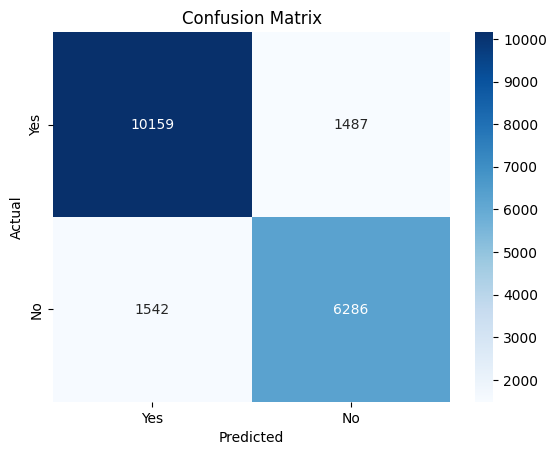

K-Fold Cross-Validation Scores: [0.82905544 0.83367556 0.85574949 0.84907598 0.84745763 0.85413457
 0.84488957 0.84797124 0.83513097 0.84334874]
Average 10-Fold CV Score: 0.844, with a standard deviation of 0.008
Precision: 0.808, Recall: 0.802, F1-Score: 0.805


In [37]:
# 1. Logistic Regression Model
logreg = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', max_iter=1000))

# Train the model
logreg.fit(X_train, Y_train)

# Predict on the training set and calculate accuracy
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_log)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, logreg.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, logreg.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(logreg, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")


### **2. [Classification] Decision Tree**
직관적인 모델로, 데이터를 **트리 구조**의 집합으로 분할하여 결정을 내리는 방식을 사용한다. 해석이 *쉽고* *다목적으로 활용* 가능하다

Training Accuracy:  100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11646
           1       1.00      1.00      1.00      7828

    accuracy                           1.00     19474
   macro avg       1.00      1.00      1.00     19474
weighted avg       1.00      1.00      1.00     19474



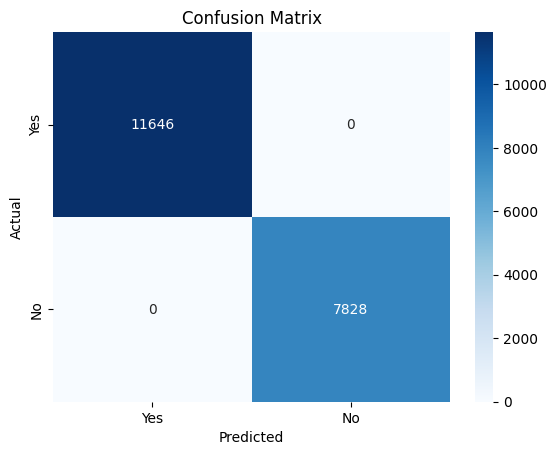

K-Fold Cross-Validation Scores: [0.89835729 0.8886037  0.89784394 0.88552361 0.89984592 0.90087314
 0.90909091 0.89008731 0.90755008 0.89625064]
Average 10-Fold CV Score: 0.897, with a standard deviation of 0.007
Precision: 0.873, Recall: 0.871, F1-Score: 0.872


In [38]:
# 2. Decision Tree
decision_tree = DecisionTreeClassifier(random_state=33)
decision_tree.fit(X_train, Y_train)

# Predict on the training set
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_decision_tree)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, decision_tree.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, decision_tree.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(decision_tree, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **3. [Classification] K-Nearest Neighbors (KNN)**
인스턴스 기반 학습 알고리즘으로, 가장 가까운 *K*개의 이웃 데이터를 바탕으로 분류 또는 회귀를 수행한다. 데이터가 **적을 때** 유용하다

Training Accuracy:  86.033
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11646
           1       0.85      0.79      0.82      7828

    accuracy                           0.86     19474
   macro avg       0.86      0.85      0.85     19474
weighted avg       0.86      0.86      0.86     19474



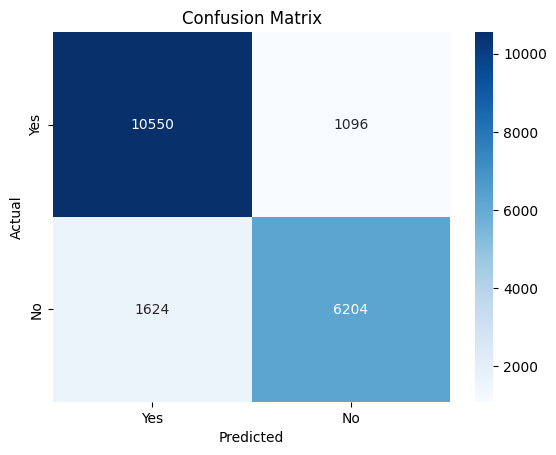

K-Fold Cross-Validation Scores: [0.65400411 0.66581109 0.67659138 0.66683778 0.66307139 0.67385722
 0.67180277 0.67437083 0.68515665 0.6779661 ]
Average 10-Fold CV Score: 0.671, with a standard deviation of 0.008
Precision: 0.595, Recall: 0.566, F1-Score: 0.580


In [39]:
# 3. K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# Predict on the training set
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_knn)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, knn.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, knn.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(knn, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **4. [Classification] Gaussian Naive Bayes (GNB)**
특성들이 독립적이라는 가정 하에, 각 클래스의 조건부 확률을 계산하여 분류를 수행하는 **확률적 모델**이다. *큰 데이터셋*과 *텍스트 데이터*에 잘 맞습니다.

Training Accuracy:  79.1
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     11646
           1       0.77      0.69      0.72      7828

    accuracy                           0.79     19474
   macro avg       0.79      0.77      0.78     19474
weighted avg       0.79      0.79      0.79     19474



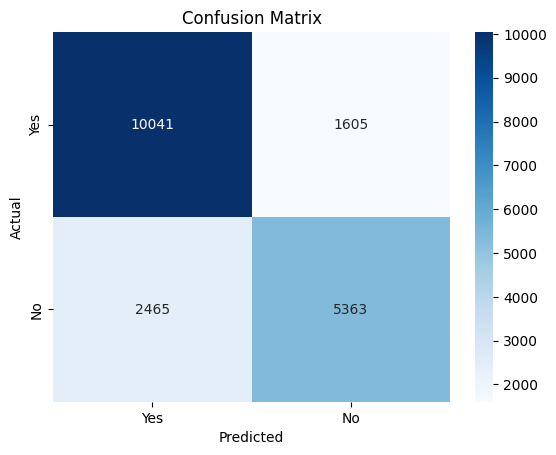

K-Fold Cross-Validation Scores: [0.78131417 0.79414784 0.79517454 0.77310062 0.78993323 0.8125321
 0.79866461 0.79250128 0.79096045 0.78941962]
Average 10-Fold CV Score: 0.792, with a standard deviation of 0.010
Precision: 0.771, Recall: 0.685, F1-Score: 0.726


In [40]:
# 4. Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

# Predict on the training set
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_gaussian)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, gaussian.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, gaussian.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(gaussian, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

### **5. [Classification] Random Forest**
**결정 트리**의 **앙상블**로, 각 트리가 서로 다른 데이터 샘플로부터 학습되며, 그 결과를 종합하여 보다 정확한 예측을 도모한다. **과적합**을 **방지**하고 *일반화 성능*을 높이는 데 효과적이다.

Training Accuracy:  100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11646
           1       1.00      1.00      1.00      7828

    accuracy                           1.00     19474
   macro avg       1.00      1.00      1.00     19474
weighted avg       1.00      1.00      1.00     19474



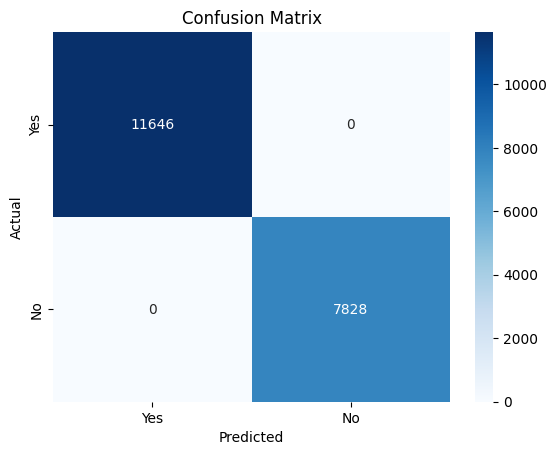

K-Fold Cross-Validation Scores: [0.91170431 0.91273101 0.91529774 0.91016427 0.91936312 0.9183359
 0.92449923 0.91628146 0.91525424 0.90703647]
Average 10-Fold CV Score: 0.915, with a standard deviation of 0.005
Precision: 0.901, Recall: 0.886, F1-Score: 0.893


In [41]:
# 5. Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=33)
random_forest.fit(X_train, Y_train)

# Predict on the training set
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 3)
print("Training Accuracy: ", acc_random_forest)

# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(Y_train, random_forest.predict(X_train)))

# Display confusion matrix
conf_matrix = confusion_matrix(Y_train, random_forest.predict(X_train))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Perform K-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=33)
cv_results = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='accuracy')

# Print the cross-validation results
print(f"K-Fold Cross-Validation Scores: {cv_results}")
print(f"Average 10-Fold CV Score: {cv_results.mean():.3f}, with a standard deviation of {cv_results.std():.3f}")

# Using different scoring metrics for cross-validation
scores_precision = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='precision')
scores_recall = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='recall')
scores_f1 = cross_val_score(random_forest, X_train, Y_train, cv=kf, scoring='f1')

print(f"Precision: {scores_precision.mean():.3f}, Recall: {scores_recall.mean():.3f}, F1-Score: {scores_f1.mean():.3f}")

전반적으로 `클래스 0 (양성)` 값이 낮아지는 대신, `클래스 1 (음성)` 값이 높아진 것을 볼 수 있다. 또, **Decision Tree**와 **Random Forest**같은 경우에는 모델의 성능이 전체적으로 약간 낮아진 것도 알 수 있다

### **모델 성능 변화에 대한 분석**
#### **1. 클래스 균형의 변화**
- **임계값**을 자살률의 `70%`로 낮춤으로써, **'양성' 클래스**의 사례 수가 **감소**하고 **'음성' 클래스**의 사례 수가 **증가**했다

#### **2. 성능 지표의 변화**
- **클래스 0 (양성)**: **정밀도**와 **재현율**이 **감소**하였습니다. 이는 **'양성' 클래스**를 **예측**하기 위한 기준이 더 엄격해져 실제 **'양성'**을 놓치는 경우가 **증가**했음을 의미한다
- **클래스 1 (음성)**: **정밀도**와 **재현율**이 향상되었다. 이는 **'음성' 클래스**의 판정 기준이 완화되어 모델이 **'음성'**을 더 잘 예측하게 됨을 나타낸다 -> `자살률을 예측하는 모델에게는 좋은 현상`

#### **Decision Tree와 Random Forest의 성능 감소**
- **Decision Tree**와 **Random Forest** 모델의 성능이 전반적으로 소폭 `감소`하였다. **임계값**의 조정이 이러한 트리 기반 모델의 데이터 분할 방식에 영향을 미쳐, 특히 **'음성' 클래스**를 처리하는 과정에서 `오류가 증가`한 것으로 보인다